# Coronavirus Analysis

In [1]:

# import the necessary libraries
import numpy as np 
import pandas as pd 

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

## India Coronavirus : A geographical analysis

With the news coming in that the [World Health Organization has declared the novel coronavirus outbreak a public health emergency](https://edition.cnn.com/2020/01/30/health/coronavirus-who-public-health-emergency-international-concern-declaration/index.html), it has increased the general fear among the public.The number of Coronavirus cases and the death toll due to the disease is growing steadily across the country. 


In [3]:
# Reading the dataset
data= pd.read_csv("Covid cases in India.csv")
data.head()

,S. No.,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Deaths
0,1,Andhra Pradesh,226,1,3
1,2,Andaman and Nicobar Islands,10,0,0
2,3,Arunachal Pradesh,1,0,0
3,4,Assam,26,0,0
4,5,Bihar,30,0,1


In [4]:
# Let's look at the various columns
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S. No.                     30 non-null     int64 
 1   Name of State / UT         30 non-null     object
 2   Total Confirmed cases      30 non-null     int64 
 3   Cured/Discharged/Migrated  30 non-null     int64 
 4   Deaths                     30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
# States affected
data.rename(columns={'Name of State / UT':'State'},inplace = True)
states = data['State'].unique().tolist()
print(states)

print("\nTotal states affected by virus: ",len(states))

['Andhra Pradesh', 'Andaman and Nicobar Islands', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Mizoram', 'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal']

Total states affected by virus:  30


### Current status worldwide

In [6]:
# Creating a dataframe with total no of confirmed cases for every state
Number_of_states = len(data['State'].value_counts())

cases = pd.DataFrame(data.groupby('State')['Total Confirmed cases'].sum())
cases['State'] = cases.index
cases.index=np.arange(1,Number_of_states+1)

global_cases = cases[['State','Total Confirmed cases']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,State,Total Confirmed cases
1,Andaman and Nicobar Islands,10
2,Andhra Pradesh,226
3,Arunachal Pradesh,1
4,Assam,26
5,Bihar,30
6,Chandigarh,18
7,Chhattisgarh,9
8,Delhi,503
9,Goa,7
10,Gujarat,122


Let's create a new dataframe which consists of the latitude and longitudes of the states under observation

In [7]:
# Importing the in_coordinates dataset
in_coordinates = pd.read_csv('in.csv')

in_coordinates.rename(columns={'admin':'State'},inplace = True)
in_coordinates=in_coordinates.replace(to_replace ="Mahārāshtra", value ="Maharashtra")
in_coordinates=in_coordinates.replace(to_replace ="Tamil Nādu", value ="Tamil Nadu")
in_coordinates=in_coordinates.replace(to_replace ="Karnātaka", value ="Karnataka")
in_coordinates=in_coordinates.replace(to_replace ="Gujarāt", value ="Gujarat")
in_coordinates=in_coordinates.replace(to_replace ="Karnātaka", value ="Rajasthan")
in_coordinates=in_coordinates.replace(to_replace ="Bihār", value ="Bihar")
in_coordinates=in_coordinates.replace(to_replace ="Jammu and Kashmīr", value ="Jammu and Kashmir")
in_coordinates=in_coordinates.replace(to_replace ="Chhattīsgarh", value ="Chhattisgarh")
in_coordinates=in_coordinates.replace(to_replace ="Chandīgarh", value ="Chandigarh")
in_coordinates=in_coordinates.replace(to_replace ="Haryāna", value ="Haryani")

print(in_coordinates)
statess = in_coordinates['State'].unique().tolist()
# states affected
print(statess)

print("\nTotal states affected by virus: ",len(statess))

            city        lat        lng country iso2           State capital  \
0         Mumbai  18.987807  72.836447   India   IN     Maharashtra   admin   
1          Delhi  28.651952  77.231495   India   IN           Delhi   admin   
2        Kolkata  22.562627  88.363044   India   IN     West Bengal   admin   
3        Chennai  13.084622  80.248357   India   IN     Tamil Nādu    admin   
4      Bengalūru  12.977063  77.587106   India   IN       Karnataka   admin   
..           ...        ...        ...     ...  ...             ...     ...   
207      Calicut  11.248016  75.780402   India   IN          Kerala   minor   
208   Kagaznāgār  19.331589  79.466051   India   IN  Andhra Pradesh   minor   
209       Jaipur  26.913312  75.787872   India   IN       Rājasthān   admin   
210  Ghandinagar  23.216667  72.683333   India   IN         Gujarat   admin   
211    Panchkula  30.691512  76.853736   India   IN         Haryani   minor   

     population  population_proper  
0    18978000.

In [8]:
# Merging the coordinates dataframe with original dataframe
in_data = pd.merge(in_coordinates,global_cases,on='State')
in_data.head()

,city,lat,lng,country,iso2,State,capital,population,population_proper,Total Confirmed cases
0,Mumbai,18.987807,72.836447,India,IN,Maharashtra,admin,18978000.0,12691836.0,690
1,Pune,18.513271,73.849852,India,IN,Maharashtra,NaN,4672000.0,2935744.0,690
2,Nāra,21.203096,79.089284,India,IN,Maharashtra,NaN,2454000.0,2228018.0,690
3,Kalyān,19.243703,73.135537,India,IN,Maharashtra,NaN,1576614.0,1576614.0,690
4,Nāsik,19.999963,73.776887,India,IN,Maharashtra,NaN,1473000.0,1289497.0,690


## Visualizing the current world scenario

In [9]:

# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(in_data['lat'], in_data['lng'], in_data['Total Confirmed cases'], in_data['State']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Total Confirmed cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map


In [10]:
# Let's look the various States affected

data.groupby(['State']).sum()

,S. No.,Total Confirmed cases,Cured/Discharged/Migrated,Deaths
State,,,,
Andaman and Nicobar Islands,2,10,0,0
Andhra Pradesh,1,226,1,3
Arunachal Pradesh,3,1,0,0
Assam,4,26,0,0
Bihar,5,30,0,1
Chandigarh,6,18,0,0
Chhattisgarh,7,9,3,0
Delhi,8,503,18,7
Goa,9,7,0,0


In [11]:
# States where deaths have taken place
data.groupby('State')['Deaths'].sum().sort_values(ascending=False)[:5]

State
Maharashtra       45
Gujarat           11
Madhya Pradesh     9
Telengana          7
Delhi              7
Name: Deaths, dtype: int64

Till now, majority of the  deaths have occured in Maharashtra.

In [12]:
# Lets also look at the Recovered stats
data.groupby('State')['Cured/Discharged/Migrated'].sum().sort_values(ascending=False)[:5]

State
Kerala         55
Maharashtra    42
Telengana      34
Haryana        25
Rajasthan      21
Name: Cured/Discharged/Migrated, dtype: int64

### Let's look at the Confirmed vs Recovered figures India

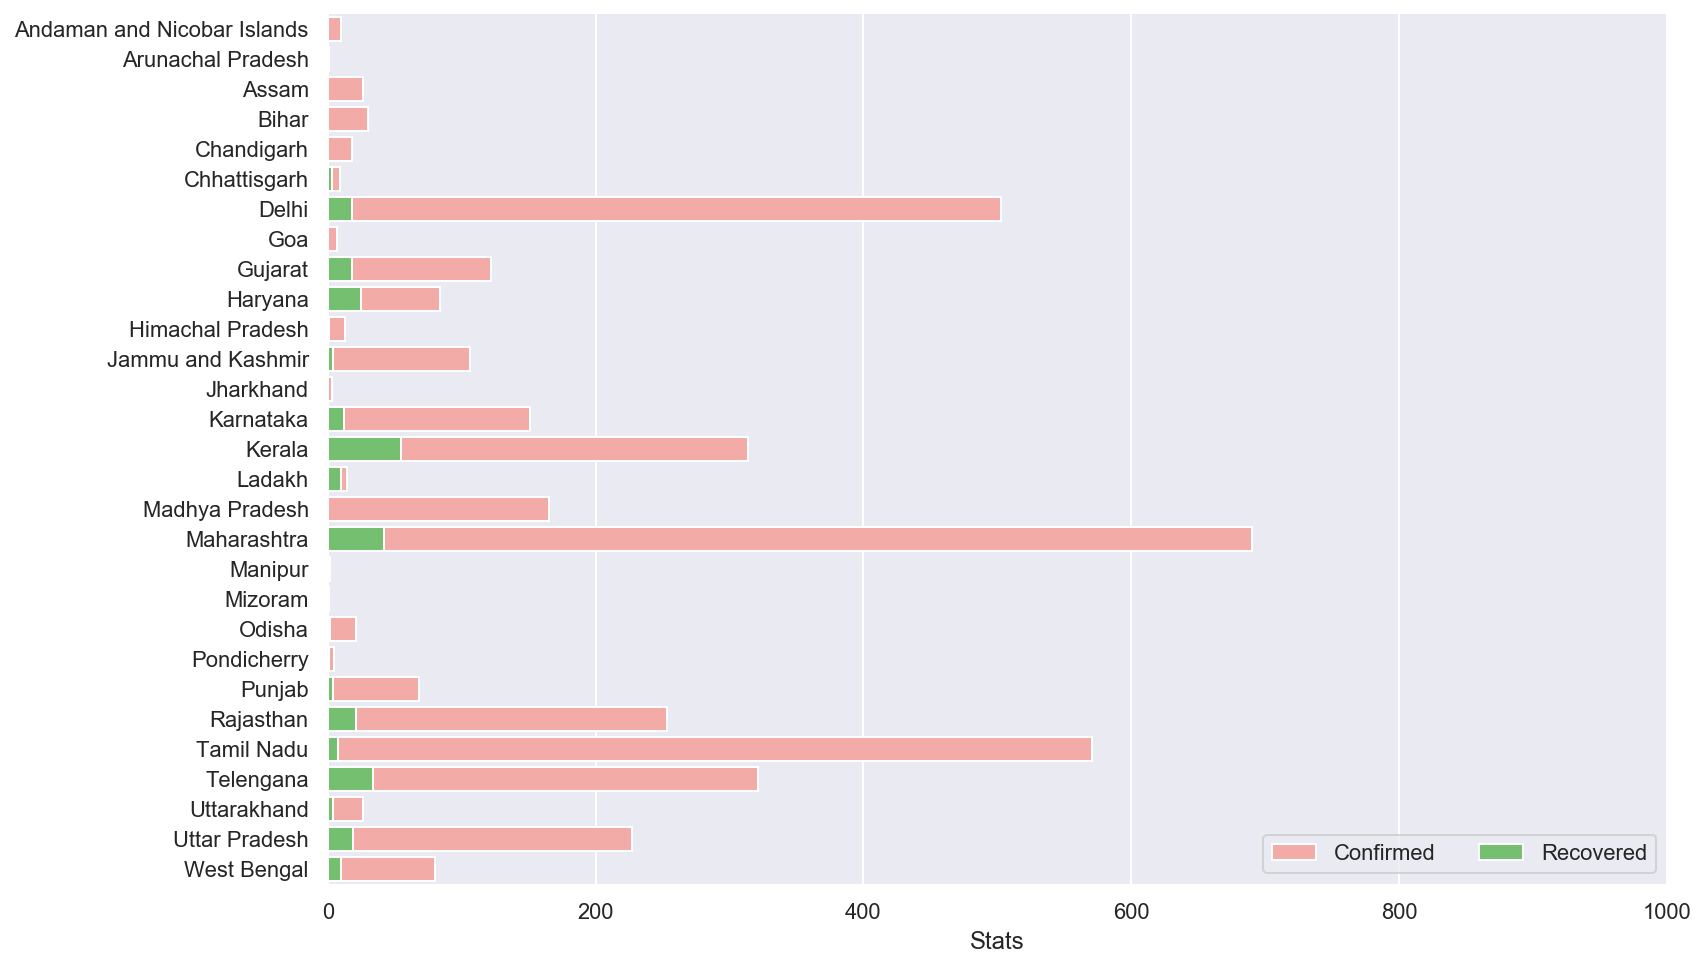

In [13]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Total Confirmed cases", y="State", data=data[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured/Discharged/Migrated", y="State", data=data[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1000), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

### Geographical Visualisation the present condition of India

In [14]:
#india coordinates
latitude = 20.5937
longitude = 78.9629
 
# create map and display it
ind_map = folium.Map(location=[latitude, longitude], zoom_start=12)

ind_coordinates= pd.read_csv("in.csv")
ind_coordinates.rename(columns={'admin':'State'},inplace=True)
df_india_virus = data.merge(ind_coordinates)

# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'name':list(df_india_virus['State']),
   'lat':list(df_india_virus['lat']),
   'lon':list(df_india_virus['lng']),
   'Confirmed':list(df_india_virus['Total Confirmed cases']),
   'Recovered':list(df_india_virus['Cured/Discharged/Migrated']),
   'Deaths':list(df_india_virus['Deaths'])
})

data.sample(5)

,name,lat,lon,Confirmed,Recovered,Deaths
24,Assam,26.757509,94.203055,26,0,0
38,Madhya Pradesh,22.717736,75.858590,165,0,9
54,Punjab,31.622337,74.875335,68,4,6
71,Uttar Pradesh,26.735389,83.380640,227,19,2
91,West Bengal,23.683333,86.983333,80,10,3


### Total confirmed cases in India till date

In [15]:
 
# create map for total confirmed cases in India till date
india_map1 = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Stamen Toner')

for lat, lon, value, name in zip(data['lat'], data['lon'], data['Confirmed'], data['name']):
    folium.CircleMarker([lat, lon],
                        radius=13,
                        popup = ('State: ' + str(name).capitalize() + '<br>'
                        'Confirmed: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(india_map1)
    folium.Map(titles='jj', attr="attribution")    
india_map1


### Total Deaths in India till date

In [16]:
'''india_map = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Stamen Toner')

for lat, lon, value, name in zip(data['lat'], data['lon'], data['Deaths'], data['name']):
    folium.CircleMarker([lat, lon],
                        radius=value*0.02,
                        popup = ('State: ' + str(name).capitalize() + '<br>'
                        'Deaths: ' + str(value) + '<br>'),
                        color='black',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(india_map)
    folium.Map(titles='jj', attr="attribution")    
india_map'''

india_map = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Stamen Toner')

for lat, lon, value, name in zip(data['lat'], data['lon'], data['Deaths'], data['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('State: ' + str(name).capitalize() + '<br>'
                        'Deaths: ' + str(value) + '<br>'),
                        color='black',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(india_map)
       
india_map


## Total Recovered cases in India till date

In [17]:
india_map = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Stamen Toner')

for lat, lon, value, name in zip(data['lat'], data['lon'], data['Recovered'], data['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('State: ' + str(name).capitalize() + '<br>'
                        'Recovered: ' + str(value) + '<br>'),
                        color='green',
                        
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(india_map)
       
india_map


In [18]:
import pandas as pd 
cases = pd.read_csv("covid_19_data.csv")
import plotly.offline as py
import plotly.express as px


py.init_notebook_mode(connected=True)

grp = cases.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
grp = grp.reset_index()
grp['Date'] = pd.to_datetime(grp['ObservationDate'])
grp['Date'] = grp['Date'].dt.strftime('%m/%d/%Y')
grp['Active'] = grp['Confirmed'] - grp['Recovered'] - grp['Deaths']
grp['Country'] =  grp['Country/Region']

fig = px.choropleth(grp, locations="Country", locationmode='country names', 
                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths,grp.Active],projection="mercator",
                     animation_frame="Date",width=1000, height=700,
                     color_continuous_scale='Reds',
                     range_color=[1000,50000],

                     title='World Map of Coronavirus')

fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

## Coronavirus Symptoms

In [19]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
symptoms

,symptom,percentage
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea or vomiting,5.0


In [20]:
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             y="percentage", x="symptom", color='symptom', 
             log_y=True, template='ggplot2', title='Symptom of  Coronavirus')
fig.show()

In [21]:
fig = px.pie(symptoms,
             values="percentage",
             names="symptom",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [22]:
fig = px.treemap(symptoms, path=['symptom'], values='percentage',
                  color='percentage', hover_data=['symptom'],
                  color_continuous_scale='Rainbow')
fig.show()

In [23]:
cases.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')